# Sales Analysis

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## Load the Data

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'./Sales_Data/{file}')
    sales_data = pd.concat([sales_data, df])

In [3]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning and Processing

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Deal with missing values

In [5]:
missing_count = sales_data.isna().sum().sort_values(ascending=False)
missing_count

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
sales_data = sales_data.dropna(how='all')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Change column datatype

In [7]:
# Get rid of header column in middle of data
sales_data = sales_data[sales_data.Product != 'Product']

# Change column datatype
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Add additional columns

#### Add Time Columns

In [8]:
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Day of Week'] = sales_data['Order Date'].dt.dayofweek
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,6,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,1,9


#### Add City

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,4,8,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,6,22,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,1,9,"Los Angeles, CA"


#### Add sales amount column

In [10]:
sales_data['Sales'] = sales_data['Quantity Ordered']* sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,4,8,"Dallas, TX",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,6,22,"Boston, MA",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14,"Los Angeles, CA",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,4,14,"Los Angeles, CA",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,1,9,"Los Angeles, CA",11.99


## Exploratory Analysis and Visualization

#### Number of orders

In [12]:
orders = sales_data[['Order ID', 'Quantity Ordered', 'Sales']].groupby('Order ID').sum()
len(orders)

178437

#### Distribution of Quantity Ordered and Sales per Order

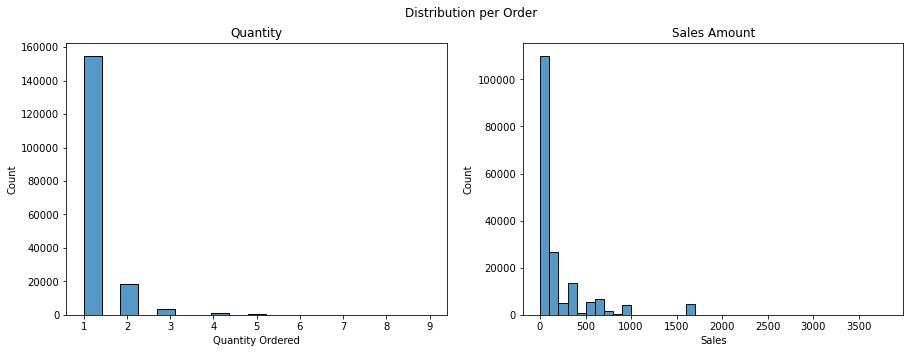

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution per Order')

sns.histplot(ax=axes[0], data=orders, x="Quantity Ordered")
axes[0].set_title('Quantity')

sns.histplot(ax=axes[1], data=orders, x="Sales", binwidth = 100)
axes[1].set_title('Sales Amount')

plt.show()

## Ask and Answer Questions

#### Question 1: What was the best month for sales? How much was earned that month?

In [11]:
sales_by_month = sales_data[['Month', 'Quantity Ordered', 'Sales']].groupby(['Month']).sum()
sales_by_month['Sales in thousands'] = sales_by_month['Sales']/1000
sales_by_month

,Quantity Ordered,Sales,Sales in thousands
Month,,,
1,10903,1822256.73,1822.25673
2,13449,2202022.42,2202.02242
3,17005,2807100.38,2807.10038
4,20558,3390670.24,3390.67024
5,18667,3152606.75,3152.60675
6,15253,2577802.26,2577.80226
7,16072,2647775.76,2647.77576
8,13448,2244467.88,2244.46788
9,13109,2097560.13,2097.56013


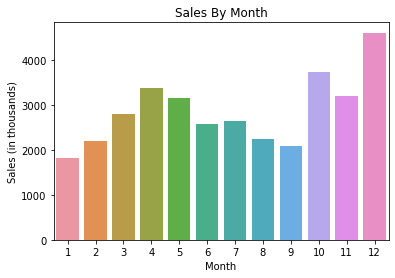

In [12]:
sns.set_palette("Set2")
ax = sns.barplot(x=sales_by_month.index, y='Sales in thousands', data=sales_by_month)
ax.set_ylabel('Sales (in thousands)')
plt.title('Sales By Month')
plt.show()

#### Question 2: What was the best day of the week for sales? How much was earned?

In [13]:
sales_by_day = sales_data[['Day of Week', 'Quantity Ordered', 'Sales']].groupby(['Day of Week']).sum()
sales_by_day['Sales in thousands'] = sales_by_day['Sales']/1000
sales_by_day

,Quantity Ordered,Sales,Sales in thousands
Day of Week,,,
0,29899,4883326.72,4883.32672
1,30724,5087956.78,5087.95678
2,29799,4988822.26,4988.82226
3,29662,4839465.16,4839.46516
4,29448,4855938.38,4855.93838
5,29769,4904357.01,4904.35701
6,29778,4932169.66,4932.16966


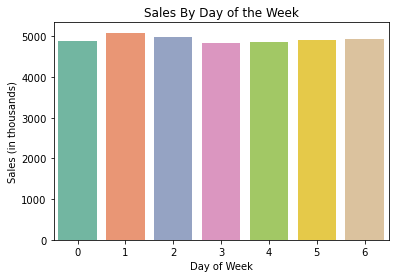

In [14]:
ax = sns.barplot(x=sales_by_day.index, y='Sales in thousands', data=sales_by_day)
ax.set_ylabel('Sales (in thousands)')
plt.title('Sales By Day of the Week')
plt.show()

#### Question 3: What time of the day has the best sales?

In [15]:
sales_by_time = sales_data[['Hour', 'Quantity Ordered', 'Sales']].groupby(['Hour']).sum()
sales_by_time['Sales in thousands'] = sales_by_time['Sales']/1000
sales_by_time

,Quantity Ordered,Sales,Sales in thousands
Hour,,,
0,4428,713721.27,713.72127
1,2619,460866.88,460.86688
2,1398,234851.44,234.85144
3,928,145757.89,145.75789
4,937,162661.01,162.66101
5,1493,230679.82,230.67982
6,2810,448113.00,448.11300
7,4556,744854.12,744.85412
8,7002,1192348.97,1192.34897


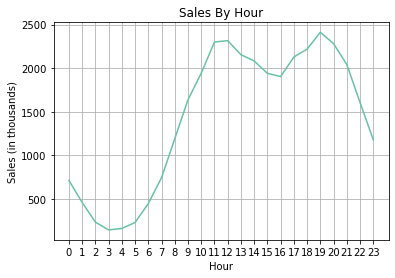

In [16]:
ax = sns.lineplot(x=sales_by_time.index, y='Sales in thousands', data=sales_by_time)
ax.set_ylabel('Sales (in thousands)')
plt.xticks(range(24))
plt.grid()
plt.title('Sales By Hour')
plt.show()

#### Question 4: What city had the best sales?

In [30]:
sales_by_city = sales_data[['City', 'Quantity Ordered', 'Sales']].groupby(['City']).sum()
sales_by_city['Sales in thousands'] = sales_by_city['Sales']/1000
sales_by_city = sales_by_city.sort_values(by=['Sales in thousands'], ascending = False)
sales_by_city

,Quantity Ordered,Sales,Sales in thousands
City,,,
"San Francisco, CA",50239,8262203.91,8262.20391
"Los Angeles, CA",33289,5452570.80,5452.57080
"New York City, NY",27932,4664317.43,4664.31743
"Boston, MA",22528,3661642.01,3661.64201
"Atlanta, GA",16602,2795498.58,2795.49858
"Dallas, TX",16730,2767975.40,2767.97540
"Seattle, WA",16553,2747755.48,2747.75548
"Portland, OR",11303,1870732.34,1870.73234
"Austin, TX",11153,1819581.75,1819.58175


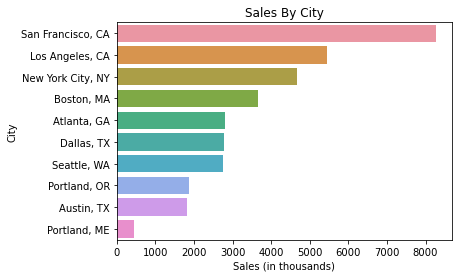

In [31]:
ax = sns.barplot(y=sales_by_city.index, x='Sales in thousands', data=sales_by_city)
ax.set_xlabel('Sales (in thousands)')
plt.title('Sales By City')
plt.show()

#### Question 5: Which product sold the most?

In [49]:
sales_by_product = sales_data[['Product', 'Quantity Ordered', 'Sales']].groupby(['Product']).sum()
sales_by_product['Quantity in thousands'] = sales_by_product['Quantity Ordered']/1000
sales_by_product['Sales in thousands'] = sales_by_product['Sales']/1000
sales_by_product['Price Each'] = sales_data.groupby('Product').mean()['Price Each']
sales_by_product = sales_by_product.sort_values(by=['Quantity Ordered'], ascending = False)
sales_by_product

,Quantity Ordered,Sales,Quantity in thousands,Sales in thousands,Price Each
Product,,,,,
AAA Batteries (4-pack),31017,92740.83,31.017,92.74083,2.99
AA Batteries (4-pack),27635,106118.40,27.635,106.11840,3.84
USB-C Charging Cable,23975,286501.25,23.975,286.50125,11.95
Lightning Charging Cable,23217,347094.15,23.217,347.09415,14.95
Wired Headphones,20557,246478.43,20.557,246.47843,11.99
Apple Airpods Headphones,15661,2349150.00,15.661,2349.15000,150.00
Bose SoundSport Headphones,13457,1345565.43,13.457,1345.56543,99.99
27in FHD Monitor,7550,1132424.50,7.550,1132.42450,149.99
iPhone,6849,4794300.00,6.849,4794.30000,700.00


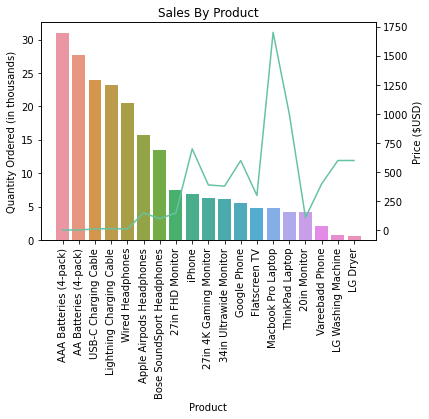

In [51]:
ax = sns.barplot(x=sales_by_product.index, y='Quantity in thousands', data=sales_by_product)
ax.set_ylabel('Quantity Ordered (in thousands)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

ax2=ax.twinx()
ax2 = sns.lineplot(x=sales_by_product.index, y='Price Each', data=sales_by_product)
ax2.set_ylabel('Price ($USD)')

plt.title('Sales By Product')
plt.show()

#### Question 6: What products are often sold together?

In [69]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
grouped_products = df.groupby('Order ID')['Product'].apply(', '.join).reset_index()
grouped_products = grouped_products.groupby(['Product']).size().reset_index(name='Count')
grouped_products = grouped_products.sort_values(by='Count', ascending = False)
grouped_products.head(10)

,Product,Count
342,"iPhone, Lightning Charging Cable",882
173,"Google Phone, USB-C Charging Cable",856
363,"iPhone, Wired Headphones",361
299,"Vareebadd Phone, USB-C Charging Cable",312
191,"Google Phone, Wired Headphones",303
334,"iPhone, Apple Airpods Headphones",286
163,"Google Phone, Bose SoundSport Headphones",161
305,"Vareebadd Phone, Wired Headphones",104
184,"Google Phone, USB-C Charging Cable, Wired Head...",77
292,"Vareebadd Phone, Bose SoundSport Headphones",60


In [72]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
grouped_products2 = df.groupby('Order ID')['Product'].apply(', '.join).reset_index()

count = Counter()

for row in grouped_products2['Product']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
